In [1]:
using PyPlot

# Aufgabe 1
gauss.jl

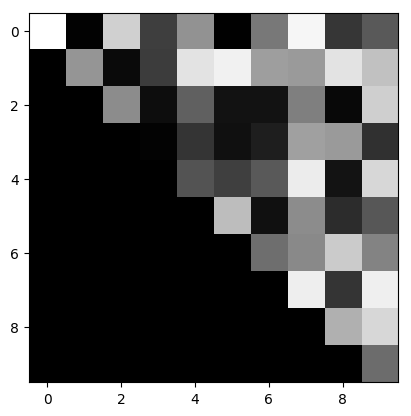

In [2]:
N = 10
A = rand(N,N)
A[1,1] = 0.99
A[1,2] = 0.01

b = rand(N)

Ap1 = 1.0*A
bp1 = 1.0*b

imshow(mod(A+0.00001,1), cmap="gray", interpolation="none")

for n in 1:(N-1)
  for i in (n+1):N
    factor = A[i,n]/A[n,n]
    for j in 1:N
      Ap1[i,j] = A[i,j] - factor*A[n,j]
    end
    bp1[i] = b[i] - factor*b[n]
  end
  A = 1.0*Ap1
  b = 1.0*bp1
  sleep(1.0)
  imshow(mod(A+0.00001,1), cmap="gray", interpolation="none")
end

### Teil a
$x_i = \frac{b_i-\sum^N_{j=i+1}A^{(N-1)}_{i,j}x_j}{A^{(N-1)}_{i,i}}$ mit $A^{(N-1)}_{i,j} = \begin{pmatrix}
A^{(N-1)}_{1,1} & A^{(N-1)}_{1,2} & \dots  & A^{(N-1)}_{1,j} \\
0	            & A^{(N-1)}_{2,2} & \dots  & A^{(N-1)}_{2,j} \\
\vdots          & 0 	          & \ddots & \vdots          \\
0 	            & \dots           & 0	   & A^{(N-1)}_{i,j}
\end{pmatrix}$

### Teil b

In [3]:
x = Array(Float64, N)
for i in N:-1:1
    sum = 0
    for j in i+1:N
        sum += A[i,j]*x[j]
    end
    x[i] = (b[i]-sum)/A[i,i]
end

### Teil c

In [4]:
N = 3
A = Array{Float64}([1 -2 2; 2 1 -4;-1 -1 2])
b = Array{Float64}([1 0 3])

# gauss1.jl
Ap1 = 1.0*A
bp1 = 1.0*b
for n in 1:(N-1)
  for i in (n+1):N
    factor = A[i,n]/A[n,n]
    for j in 1:N
      Ap1[i,j] = A[i,j] - factor*A[n,j]
    end
    bp1[i] = b[i] - factor*b[n]
  end
  A = 1.0*Ap1
  b = 1.0*bp1
end

# Teil b 
x = Array(Float64, N)
for i in N:-1:1
    sum = 0
    for j in i+1:N
        sum += A[i,j]*x[j]
    end
    x[i] = (b[i]-sum)/A[i,i]
end

x

3-element Array{Float64,1}:
 -4.0
 -6.0
 -3.5

# Aufgabe 3
### Funktionen

In [5]:
function H(x, n)
    if n < 0
        error("negative n not allowed")
    elseif n == 0
        return Float64(1)
    elseif n == 1
        return 2*x
    else
        memory = Array{Float64}(3)
        memory[1] = 1
        memory[2] = 2*x
        for i in 2:n
            memory[3] = 2*x*memory[2]-2*(i-1)*memory[1]
            memory[1] = memory[2]
            memory[2] = memory[3]
        end
        return memory[2]
    end
end
function phi(x,n)
    return pi^(-1/4)/sqrt(2^n*factorial(n))*H(x,n)*exp(-1//2*x^2)
end
function V(x)
    return 1//2*x^2
end
function E(n)
    return n+1//2
end

function trapeze(func, start, stop, N, args=[])
    h = (stop-start)/(N-1)
    I = -h*(func(start,args...)+func(stop,args...))/2
    for x = linspace(start, stop, N)
        I += h*func(x, args...)
    end
    return I
end
;

### Teil a

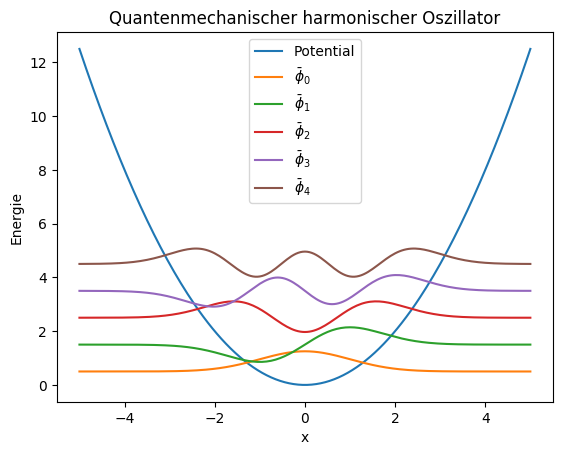

In [6]:
figure(1)
X = Array(linspace(-5,5,201))
plot(X, V.(X), label="Potential")
for n in 0:4
    plot(X, phi.(X,n)+E(n), label="\$\\bar\\phi_$n\$")
end
xlabel("x")
ylabel("Energie")
title("Quantenmechanischer harmonischer Oszillator")
legend()
show()

### Teil b
da $\phi_n$ reell ist, gilt $\phi_n^* = \phi_n$

In [7]:
function prod_phi_mn(x,m,n)
    return phi(x,m)*phi(x,n)
end
D = Array{Float64}(5,5)
for m in 0:4
    for n in 0:4
        D[m+1,n+1] = trapeze(prod_phi_mn,-5,5,100000,[m,n])
    end
end
D

5×5 Array{Float64,2}:
  1.0           2.8563e-18   -5.54028e-11  -1.30139e-18  -7.51719e-10
  2.8563e-18    1.0          -2.80557e-17  -1.5994e-9     1.86331e-17
 -5.54028e-11  -2.80557e-17   1.0           1.38514e-17  -2.71767e-8 
 -1.30139e-18  -1.5994e-9     1.38514e-17   1.0          -1.30348e-17
 -7.51719e-10   1.86331e-17  -2.71767e-8   -1.30348e-17   1.0        